In [1]:
import numpy as np
import pandas as pd
from statistics import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataset
df = pd.read_csv("FINAL_DATA.csv")

In [3]:
#Summary of N/A Value
df.isnull().sum()

team                0
result            324
margin            357
br               5572
toss             3946
bat              3946
opposition          0
ground              0
date                0
url                 0
scrapped_date       0
dtype: int64

In [4]:
df['toss'] = df['toss'].map( {'lost':0, 'won':1,})

In [5]:
df['result'] = df['result'].map( {'lost':0, 'won':1,})

In [6]:
df['bat'] = df['bat'].map( {'1st':1, '2nd':2,})

In [7]:
df=df.drop(['url','scrapped_date','date'],axis=1)

In [12]:
import os
def to_int(x):
    '''
    This function will try to convert a string into an integer if it is possible,
    else it will remain as np.nan
    '''
    try:
        return int(x)
    except:
        return np.nan
df['br'] = df['br'].replace('-', np.nan)
df['br'] = df['br'].apply(lambda x : to_int(x))


In [16]:
df = df.bfill(axis=0)

In [17]:
df.isnull().sum()

team          0
result        0
margin        0
br            0
toss          0
bat           0
opposition    0
ground        0
dtype: int64

In [19]:
df

,team,result,margin,br,toss,bat,opposition,ground
0,Australia,1.0,5 wicke,42,1.0,2.0,England,Melbourne
1,England,0.0,5 wicke,42,1.0,2.0,Australia,Melbourne
2,England,1.0,6 wicke,35,1.0,2.0,Australia,Manchester
3,Australia,0.0,6 wicke,35,1.0,2.0,England,Manchester
4,Australia,1.0,5 wicke,21,1.0,2.0,England,Lord's
...,...,...,...,...,...,...,...,...
8192,Ireland,0.0,7 wicke,28,1.0,1.0,Afghanistan,Dhabi
8193,Bangladesh,1.0,120 run,0,0.0,1.0,West Indies,Chattogram
8194,West Indies,0.0,120 run,0,0.0,1.0,Bangladesh,Chattogram
8195,Afghanistan,1.0,36 run,0,0.0,1.0,Abu,Dhabi


In [18]:
#SWEETVIZ Repot
import sweetviz as sv
dataset_report = sv.analyze(df)
dataset_report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [36]:
def team_plot(team,X,Hue,title,xlab,ylab):
    new_df = df.loc[df['team'] == team]
    plt.figure(figsize=(20,3), facecolor='w')
    sns.countplot(x=X,data=new_df,hue=Hue)
    plt.title(team+"'s " + title, size=20)
    plt.xlabel(xlab, size=10)
    plt.ylabel(ylab, size=10)
    plt.xticks(size=8)
    plt.yticks(size=8)
    return plt.show()

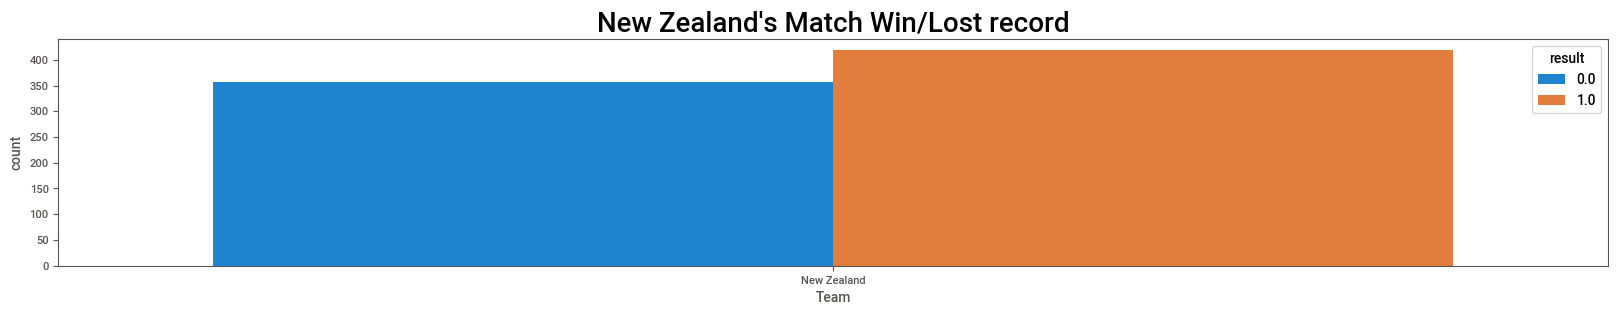

In [37]:
 team_plot("New Zealand","team","result", "Match Win/Lost record","Team","count")

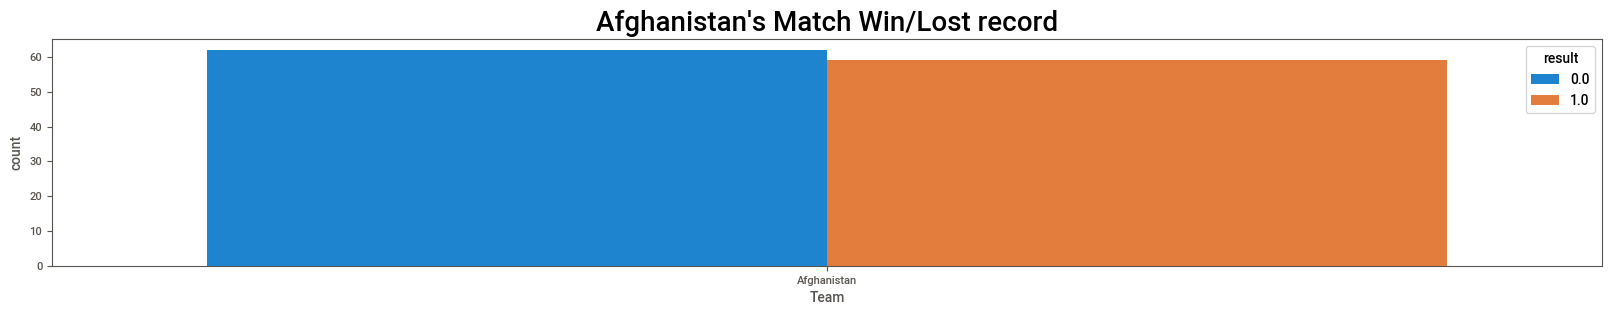

In [38]:
 team_plot("Afghanistan","team","result","Match Win/Lost record","Team","count")

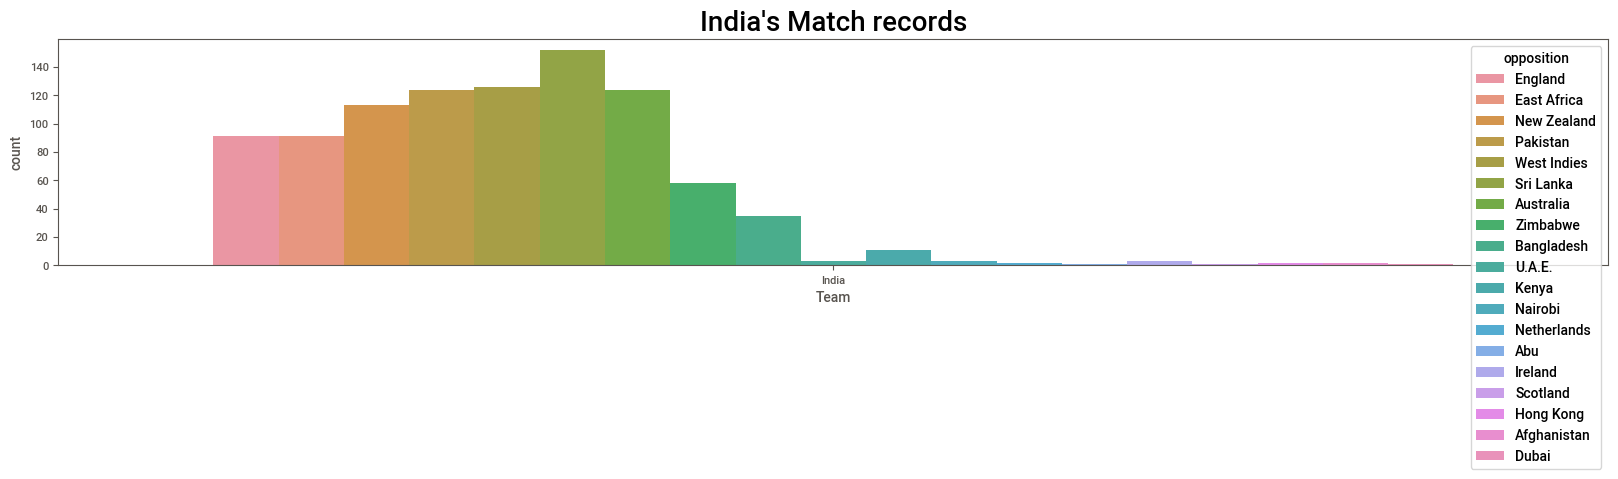

In [40]:
team_plot("India","team","opposition","Match records","Team","count")

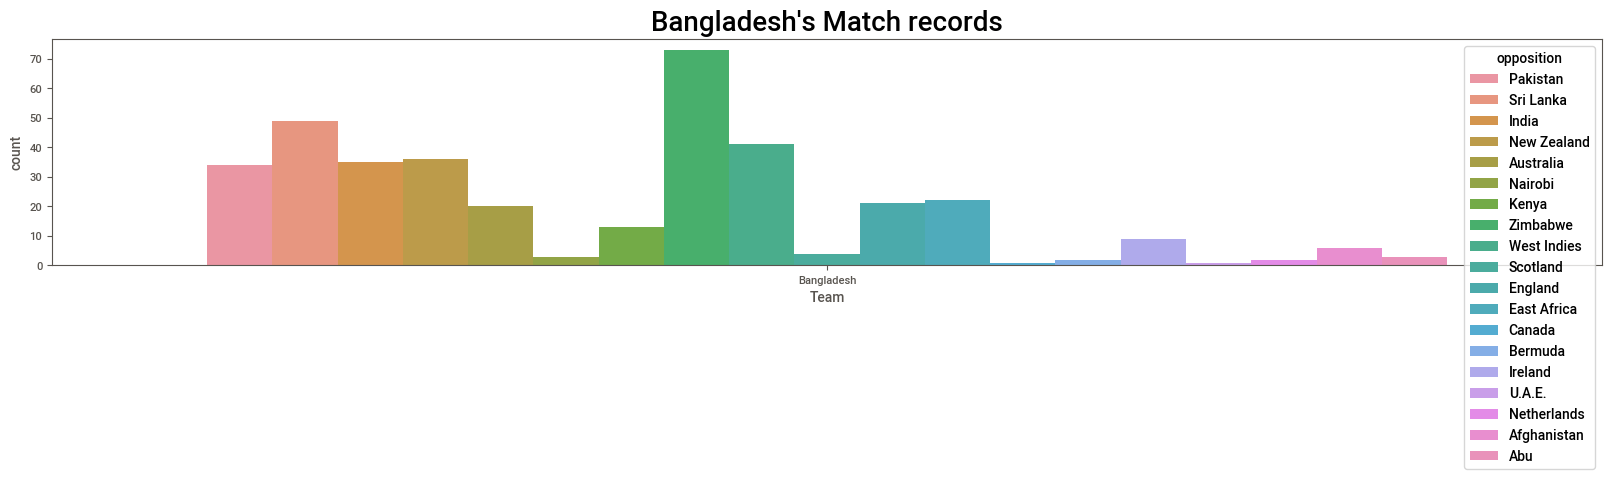

In [41]:
team_plot("Bangladesh","team","opposition","Match records","Team","count")

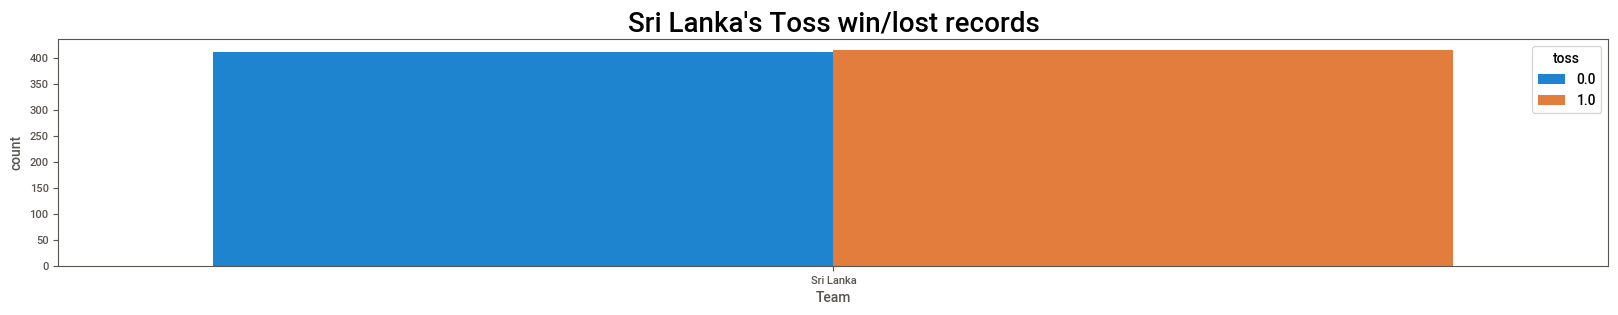

In [44]:
team_plot("Sri Lanka","team","toss","Toss win/lost records","Team","count")

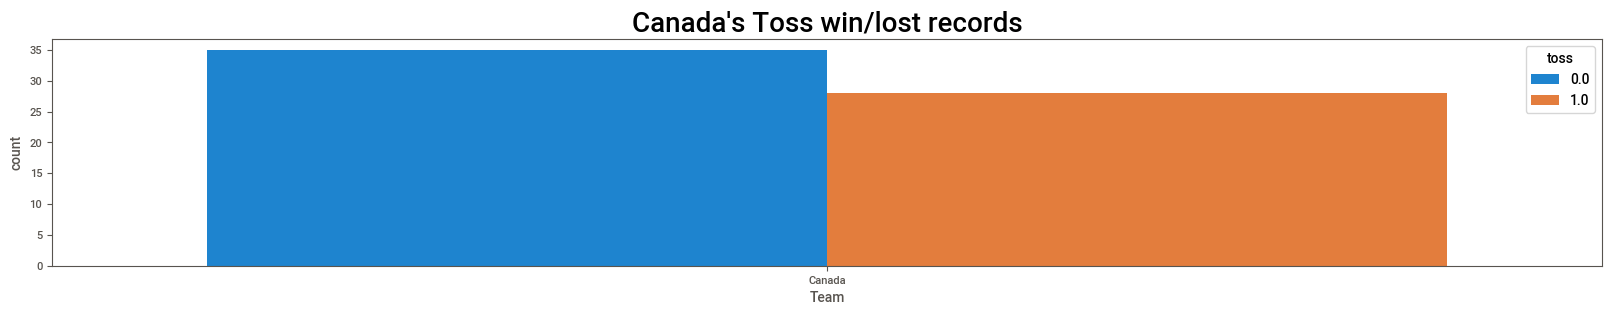

In [46]:
team_plot("Canada","team","toss","Toss win/lost records","Team","count")

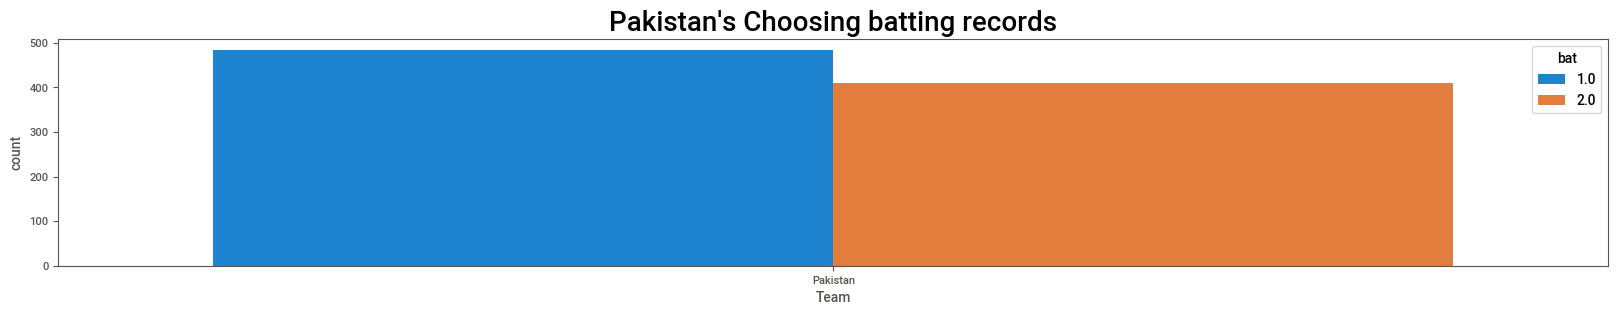

In [48]:
team_plot("Pakistan","team","bat","Choosing batting records","Team","count")

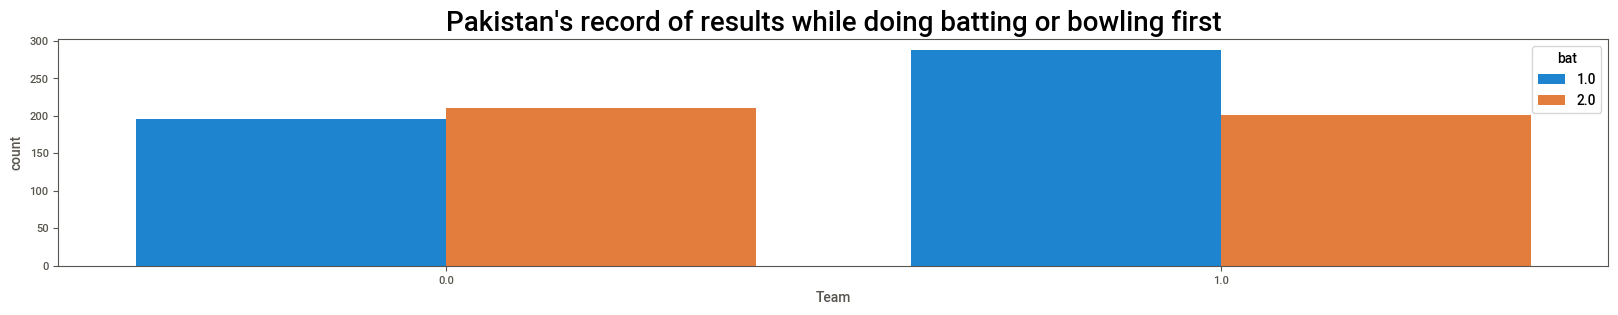

In [50]:
team_plot("Pakistan","result","bat","record of results while doing batting or bowling first","Team","count")

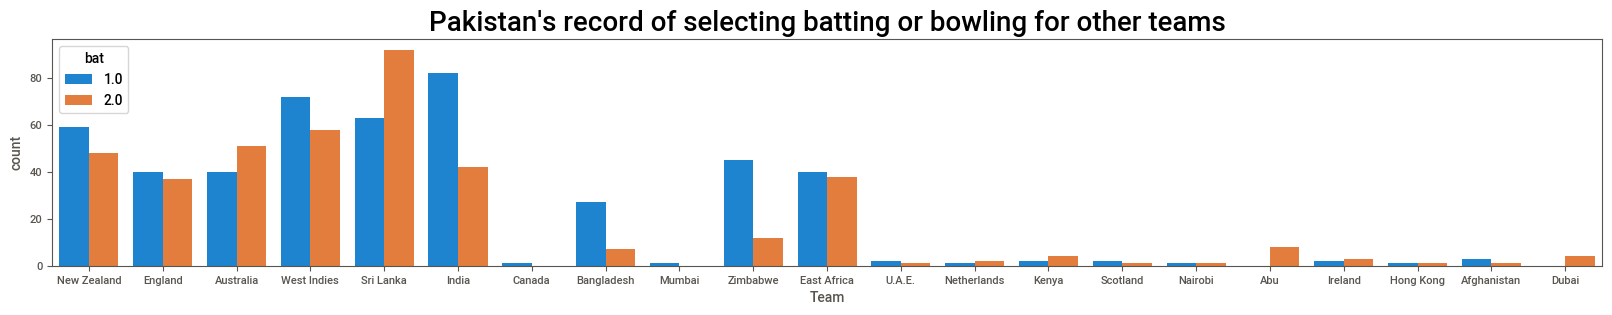

In [52]:
team_plot("Pakistan","opposition","bat","record of selecting batting or bowling for other teams","Team","count")

In [55]:
def groupby(team):
    group_df = df.loc[df['team'] == team]
    grouped_df = group_df.groupby("opposition")
    grouped_lists = grouped_df["ground"].apply(list)
    grouped_lists = grouped_lists.reset_index()
    return grouped_lists

In [57]:
groupby("India")

,opposition,ground
0,Abu,[Dhabi]
1,Afghanistan,"[Dhaka, Southampton]"
2,Australia,"[Melbourne, Sydney, Sydney, Melbourne, Sydney,..."
3,Bangladesh,"[Chattogram, Chandigarh, Sharjah, Colombo, Dha..."
4,Dubai,[Dubai]
5,East Africa,"[Leeds, Kolkata, Gwalior, Delhi, Adelaide, Tow..."
6,England,"[Leeds, Oval, Lord's, Ahmedabad, Jalandhar, Cu..."
7,Hong Kong,"[Karachi, Dubai]"
8,Ireland,"[Belfast, Bengaluru, Hamilton]"
9,Kenya,"[Cuttack, Bengaluru, Gwalior, Kolkata, Bristol..."


In [58]:
groupby("Zimbabwe")

,opposition,ground
0,Afghanistan,"[Bulawayo, Bulawayo, Bulawayo, Bulawayo, Bulaw..."
1,Australia,"[Nottingham, Southampton, Chennai, Cuttack, Ho..."
2,Bangladesh,"[Dhaka, Dhaka, Harare, Harare, Bulawayo, Chatt..."
3,Canada,[Nagpur]
4,East Africa,"[Canberra, Bengaluru, Harare, Harare, Centurio..."
5,England,"[Albury, Sydney, Brisbane, Bulawayo, Harare, H..."
6,Hong Kong,[Bulawayo]
7,India,"[Leicester, Mumbai, Ahmedabad, Hamilton, Harar..."
8,Ireland,"[Harare, Harare, Harare, Hobart, Harare, Harar..."
9,Kenya,"[Patna, Nairobi, Nairobi, Dhaka, Dhaka, Dhaka,..."


In [67]:
def ground_count(team):
    group_df = df.loc[df['team'] == team]
    ground_count = group_df.groupby(["opposition","ground"])["ground"].count()
    return print(ground_count)

In [69]:
ground_count("Netherlands")

opposition   ground       
Afghanistan  Amstelveen       2
             Hague            1
             Rotterdam        1
             Sharjah          2
Australia    Basseterre       1
             Potchefstroom    1
Bangladesh   Chattogram       1
             Glasgow          1
Bermuda      Amstelveen       1
             Benoni           1
             Nairobi          1
             Potchefstroom    2
             Rotterdam        2
Canada       Amstelveen       1
             Benoni           1
             Maunganui        1
             Nairobi          1
             Potchefstroom    1
             Rotterdam        1
             Toronto          1
East Africa  Amstelveen       1
             Basseterre       1
             Mohali           1
             Rawalpindi       1
England      London           1
             Nagpur           1
             Peshawar         1
India        Delhi            1
             Paarl            1
Ireland      Amstelveen       2
             

In [94]:
df[(df.team == 'India') & (df.result == 1.0)]

,team,result,margin,br,toss,bat,opposition,ground
46,India,1.0,10 wicke,181,0.0,2.0,East Africa,Leeds
102,India,1.0,4 run,0,1.0,1.0,Pakistan,Quetta
188,India,1.0,66 run,0,0.0,1.0,Australia,Melbourne
192,India,1.0,5 run,0,1.0,1.0,New Zealand,Perth
200,India,1.0,6 run,0,1.0,1.0,New Zealand,Adelaide
...,...,...,...,...,...,...,...,...
8091,India,1.0,7 wicke,15,0.0,1.0,Australia,Bengaluru
8133,India,1.0,71 run,0,1.0,1.0,East Africa,Dharamsala
8139,India,1.0,6 wicke,0,0.0,1.0,East Africa,Lucknow
8141,India,1.0,6 wicke,0,0.0,1.0,East Africa,Kolkata


In [95]:
def ww(te,re):
    group_df = df[(df.team == te) & (df.result == re)]
    ground_count = group_df.groupby(["opposition","ground","result"])["ground"].count()
    return print(ground_count)

In [96]:
ww("India",1.0)

opposition   ground       result
Abu          Dhabi        1.0       1
Afghanistan  Dhaka        1.0       1
             Southampton  1.0       1
Australia    Adelaide     1.0       2
             Ahmedabad    1.0       2
                                   ..
Zimbabwe     Pune         1.0       1
             Rajkot       1.0       1
             Sharjah      1.0       4
             Singapore    1.0       1
             Vadodara     1.0       1
Name: ground, Length: 298, dtype: int64


In [98]:
ww("Netherlands",0.0)

opposition   ground         result
Afghanistan  Amstelveen     0.0       1
             Hague          0.0       1
             Rotterdam      0.0       1
             Sharjah        0.0       1
Australia    Basseterre     0.0       1
             Potchefstroom  0.0       1
Bangladesh   Chattogram     0.0       1
Bermuda      Benoni         0.0       1
East Africa  Amstelveen     0.0       1
             Basseterre     0.0       1
             Mohali         0.0       1
             Rawalpindi     0.0       1
England      London         0.0       1
             Nagpur         0.0       1
             Peshawar       0.0       1
India        Delhi          0.0       1
             Paarl          0.0       1
Ireland      Amstelveen     0.0       2
             Belfast        0.0       1
             Dublin         0.0       3
             Kolkata        0.0       1
Kenya        Lincoln        0.0       1
             Nairobi        0.0       2
Nairobi      Nairobi        0.0       1
Nepal

In [104]:
def br_g_plot(te,b,X,Hue,title,xlab,ylab):
    new_df = df[(df.team == te) & (df.br >= b)]
    plt.figure(figsize=(20,3), facecolor='w')
    sns.countplot(x=X,data=new_df,hue=Hue)
    plt.title(te+"'s " + title, size=20)
    plt.xlabel(xlab, size=10)
    plt.ylabel(ylab, size=10)
    plt.xticks(size=8)
    plt.yticks(size=8)
    return plt.show()

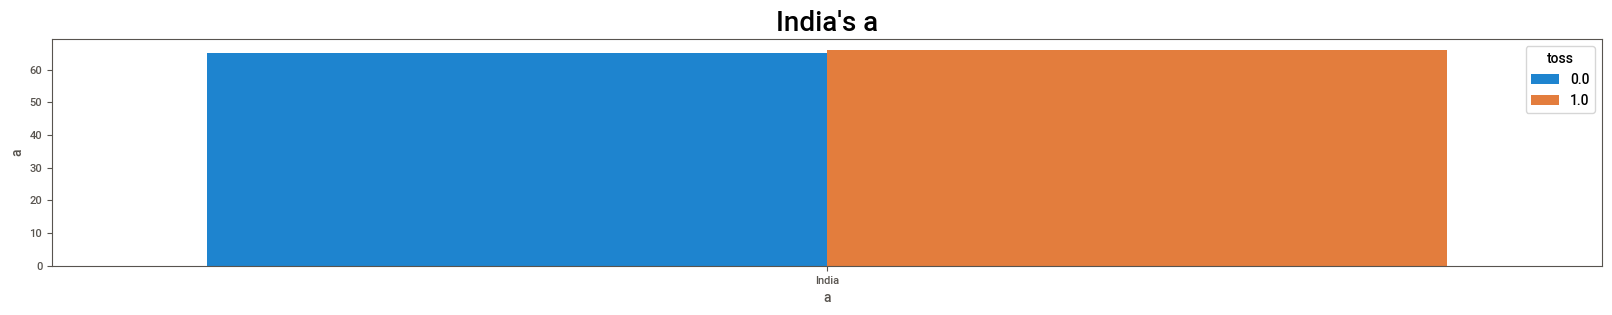

In [105]:
br_g_plot("India",50,"team","toss","a","a","a")